In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
data = pd.read_csv('https://github.com/ifan007/Prediksi-Stroke/blob/main/healthcare-dataset-stroke-data.csv?raw=true')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<ipython-input-4-ba1b3135062a>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


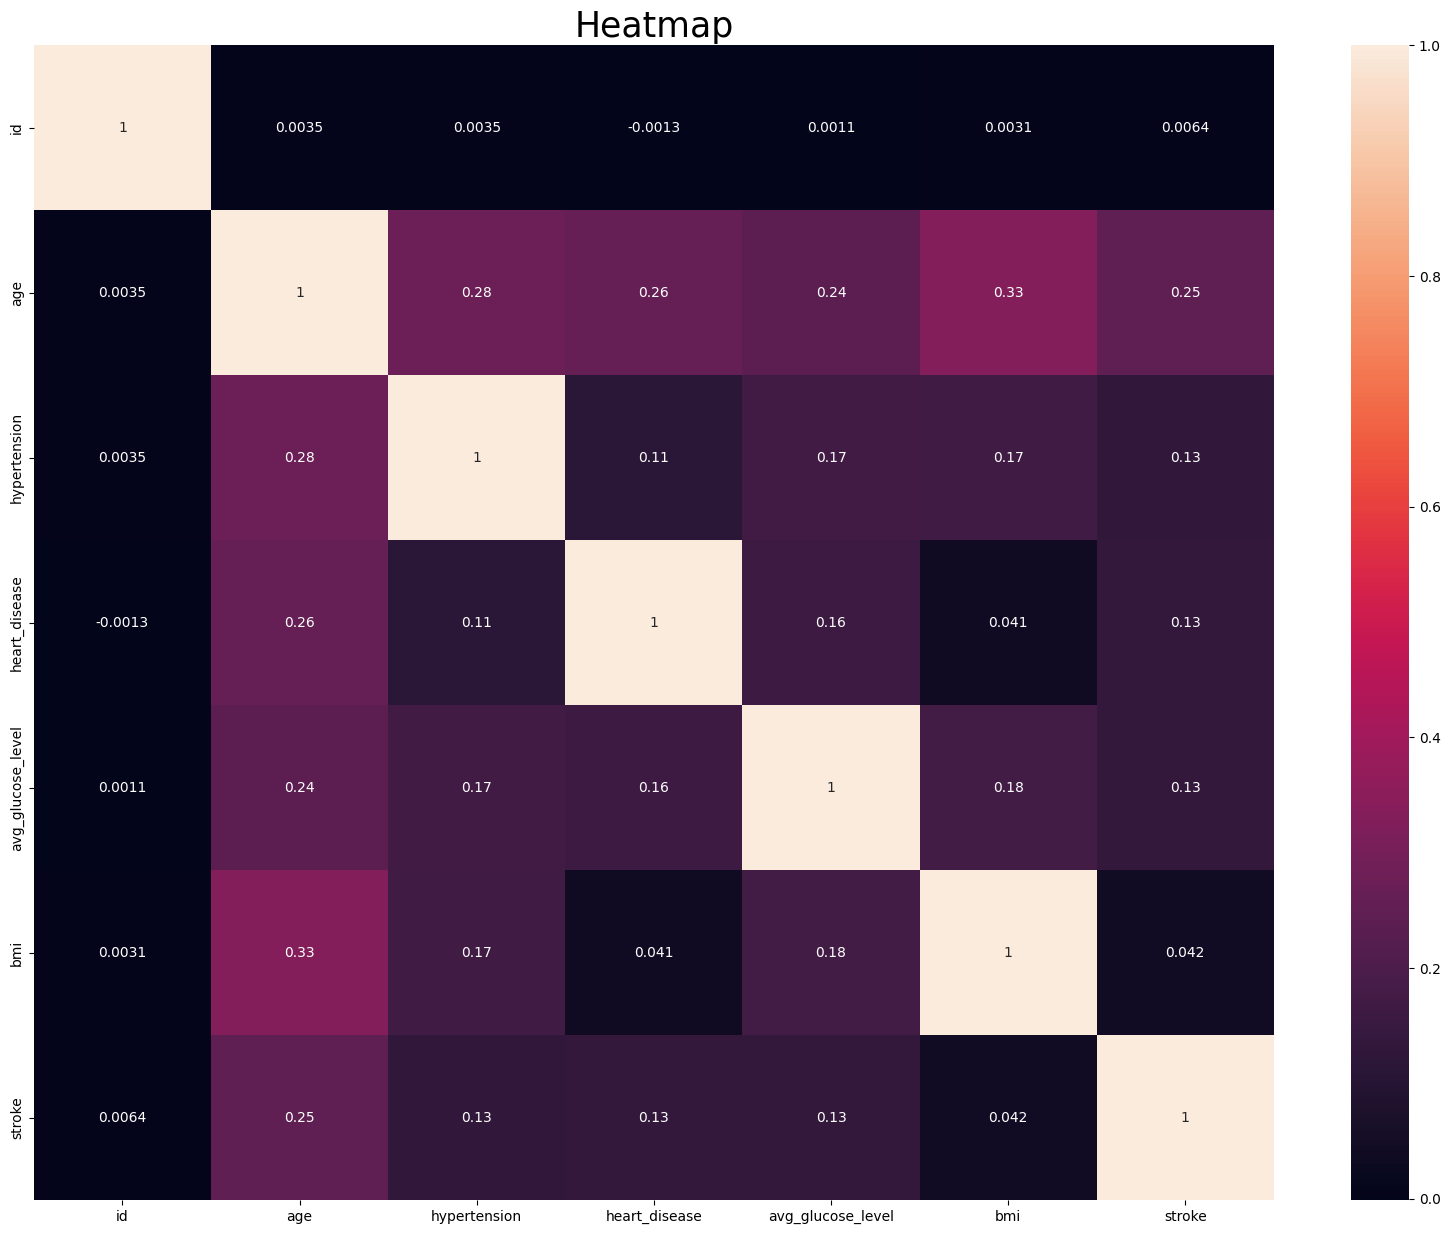

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)
plt.title("Heatmap", fontsize = 25);
plt.show()

In [ ]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data['bmi'].mean()

28.893236911794666

In [ ]:
data['bmi'].fillna(data['bmi'].mean(), inplace = True)

In [ ]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
def conversiongender(gender):
    if gender == "Male":
        return 1
    else:
        return 0

def conversionmarried(married):
    if married == "Yes":
        return 1
    else:
        return 0

def conversionwork(work):
    if work == "Private":
        return 1
    elif work == "Self-employed":
        return 2
    elif work == "Govt_job":
        return 3
    elif work == "children":
        return 4
    else:
        return 0

def conversionresidence(rtype):
    if rtype == "Urban":
        return 1
    else:
        return 0

def conversionsmoke(smoke):
    if smoke == "formerly smoked":
        return 1
    elif smoke == "never smoked":
        return 2
    elif smoke == "smokes":
        return 3
    else:
        return 4



In [ ]:
data['gender'] = data['gender'].apply(conversiongender).astype('int')
data['ever_married'] = data['ever_married'].apply(conversionmarried).astype('int')
data['Residence_type'] = data['Residence_type'].apply(conversionresidence).astype('int')
data['work_type'] = data['work_type'].apply(conversionwork).astype('int')
data['smoking_status'] = data['smoking_status'].apply(conversionsmoke).astype('int')

In [ ]:
data.loc[data['bmi'] <= 18.5, 'bmi'] = 0 # underweight
data.loc[(data['bmi'] > 18.5) & (data['bmi'] <= 24.9), 'bmi'] = 1 # normal
data.loc[(data['bmi'] > 24.9) & (data['bmi'] <= 29.9), 'bmi'] = 2 # overweight
data.loc[(data['bmi'] > 29.9) , 'bmi'] = 3 # obese
data['bmi'] = data['bmi'].astype('int')

In [ ]:
data.loc[data['avg_glucose_level'] <= 100, 'avg_glucose_level'] = 0 # normal
data.loc[(data['avg_glucose_level'] > 100) & (data['avg_glucose_level'] <= 125), 'avg_glucose_level'] = 1 # pre-diabetes
data.loc[(data['avg_glucose_level'] > 125), 'avg_glucose_level'] = 2 # diabetes
data['avg_glucose_level'] = data['avg_glucose_level'].astype('int')

In [ ]:
data.loc[data['age'] <= 18, 'age'] = 0  # children
data.loc[(data['age'] > 18) & (data['age'] <= 35), 'age'] = 1 # adults
data.loc[(data['age'] > 35) & (data['age'] <= 65), 'age'] = 2 # older adults
data.loc[(data['age'] > 65) , 'age'] = 3 # elderly
data['age'] = data['age'].astype('int')

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,3,0,1,1,1,1,2,3,1,1
1,51676,0,2,0,0,1,2,0,2,2,2,1
2,31112,1,3,0,1,1,1,0,1,3,2,1
3,60182,0,2,0,0,1,1,1,2,3,3,1
4,1665,0,3,1,0,1,2,0,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,3,1,0,1,1,1,0,2,2,0
5106,44873,0,3,0,0,1,2,1,2,3,2,0
5107,19723,0,1,0,0,1,2,0,0,3,2,0
5108,37544,1,2,0,0,1,1,0,2,2,1,0


In [ ]:
X = data.drop(['id', 'stroke'], axis=1)
y = data['stroke']

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,3,0,1,1,1,1,2,3,1
1,0,2,0,0,1,2,0,2,2,2
2,1,3,0,1,1,1,0,1,3,2
3,0,2,0,0,1,1,1,2,3,3
4,0,3,1,0,1,2,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...
9717,0,3,1,0,1,2,0,0,2,2
9718,0,3,0,0,1,2,0,0,2,1
9719,0,2,0,1,1,1,1,2,2,4
9720,0,3,0,0,1,1,0,0,3,2


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9717    1
9718    1
9719    1
9720    1
9721    1
Name: stroke, Length: 9722, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
6454,0,3,0,0,1,1,0,2,3,1
8837,0,3,1,0,1,2,0,0,3,1
7107,1,3,0,0,1,1,1,1,2,4
2697,0,3,1,0,1,1,0,2,2,2
8633,1,3,0,0,1,1,1,2,2,4
...,...,...,...,...,...,...,...,...,...,...
9000,0,3,0,0,1,1,1,0,1,3
1218,1,0,0,0,0,4,0,0,1,4
6915,0,2,0,0,0,1,1,0,3,2
8680,0,2,0,0,1,3,1,2,2,2


In [ ]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
6875,0,1,0,0,0,3,1,0,2,2
6923,0,3,0,1,1,1,1,2,2,2
1503,0,2,1,1,1,1,1,2,2,1
3833,0,2,0,0,1,1,0,2,3,2
1367,1,1,0,0,1,1,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...
7167,0,2,0,0,1,1,0,0,3,1
1942,1,0,0,0,0,4,1,0,3,4
7810,0,3,0,0,0,3,1,0,2,4
4467,1,2,0,0,1,1,0,0,0,2


In [ ]:
y_train

6454    1
8837    1
7107    1
2697    0
8633    1
       ..
9000    1
1218    0
6915    1
8680    1
427     0
Name: stroke, Length: 7777, dtype: int64

In [ ]:
y_test

6875    1
6923    1
1503    0
3833    0
1367    0
       ..
7167    1
1942    0
7810    1
4467    0
4675    0
Name: stroke, Length: 1945, dtype: int64

In [ ]:
x_train.shape

(7777, 10)

In [ ]:
x_test.shape

(1945, 10)

In [ ]:
y_train.shape

(7777,)

In [ ]:
x_val = x_train[:500]
y_val = y_train[:500]

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
#Dense model architecture -> RNN
model = Sequential()
model.add(LSTM(64, input_shape = (10,1), return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 10, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 115841 (452.50 KB)
Trainable params: 115841 (452.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=25,batch_size=20,validation_split=0.2)

Epoch 1/25
312/312 [==============================] - 13s 28ms/step - loss: 0.6160 - accuracy: 0.6351 - val_loss: 0.5661 - val_accuracy: 0.6652
Epoch 2/25
312/312 [==============================] - 7s 22ms/step - loss: 0.5496 - accuracy: 0.6965 - val_loss: 0.5550 - val_accuracy: 0.6934
Epoch 3/25
312/312 [==============================] - 8s 25ms/step - loss: 0.5368 - accuracy: 0.7004 - val_loss: 0.5474 - val_accuracy: 0.7031
Epoch 4/25
312/312 [==============================] - 7s 21ms/step - loss: 0.5319 - accuracy: 0.7124 - val_loss: 0.5356 - val_accuracy: 0.6838
Epoch 5/25
312/312 [==============================] - 9s 27ms/step - loss: 0.5226 - accuracy: 0.7160 - val_loss: 0.5283 - val_accuracy: 0.6999
Epoch 6/25
312/312 [==============================] - 7s 21ms/step - loss: 0.5188 - accuracy: 0.7195 - val_loss: 0.5377 - val_accuracy: 0.7050
Epoch 7/25
312/312 [==============================] - 8s 25ms/step - loss: 0.5131 - accuracy: 0.7304 - val_loss: 0.5208 - val_accuracy: 0.715

In [ ]:
metrics = pd.DataFrame(history.history)

metrics.rename(columns = {'loss':'Training_Loss', 'accuracy':"Training_Accuracy", 'val_loss':'Validation_Loss', 'val_accuracy':"Validation_Accuracy"}, inplace = True)


In [ ]:
def plot_graphs1(var1,var2,string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel('Number of Epochs')
    plt.ylabel(string)
    plt.legend([var1,var2])

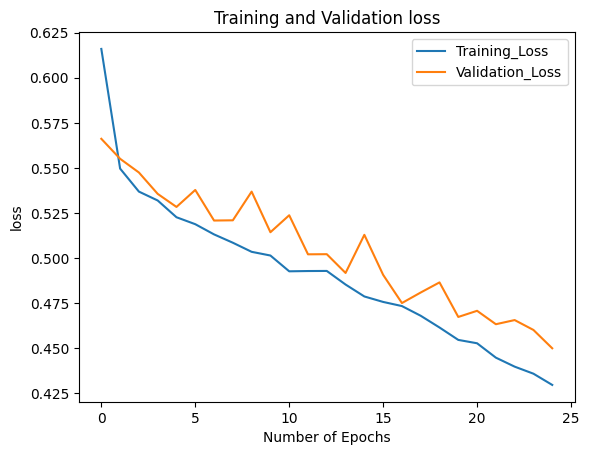

In [ ]:
#plot for Evaluation metrics
plot_graphs1('Training_Loss','Validation_Loss', 'loss')

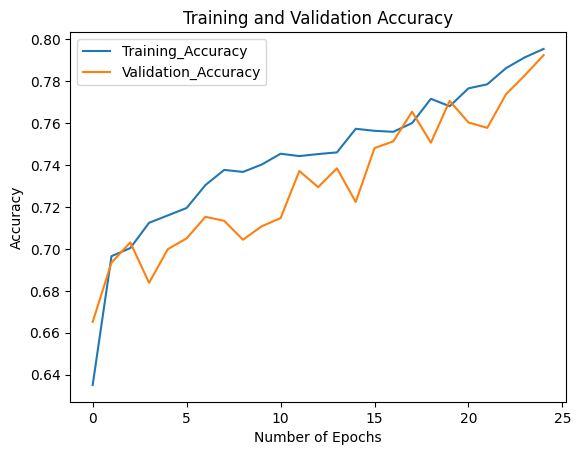

In [ ]:
plot_graphs1('Training_Accuracy','Validation_Accuracy', 'Accuracy')

In [ ]:
from sklearn.metrics import confusion_matrix
pred = (model.predict(x_test)>0.5).astype("int32")
acc = model.evaluate(x_test, y_test)
proba_nn = model.predict(x_test)

print("Test loss is {0:.2f} accuracyc is {1:.2f} ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

61/61 [==============================] - 1s 8ms/step
Test loss is 0.43 accuracyc is 0.80 
[[698 110]
 [275 862]]


<Axes: >

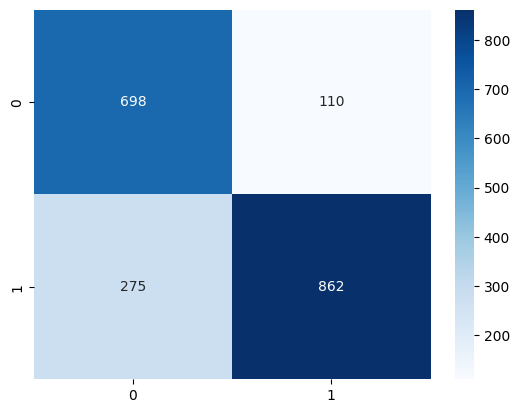

In [ ]:
cf_matrix = confusion_matrix(pred,y_test)
sns.heatmap(cf_matrix,annot=True, fmt='',cmap='Blues')